# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# import dependencies
import pandas as pd 
import numpy as np 
import scipy.stats as sts 
import matplotlib.pyplot as plt 
import random
import requests
import pprint
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# import data randomly from Citipy database ("citipy")
filename = "Resources/worldcities.csv"
n = sum(1 for line in open(filename)) - 1
s = 600
skip = sorted(random.sample(range(1,n+1),n-s))
cities_data = pd.read_csv(filename, skiprows=skip)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# grab cities from dataframe and add to list
cities = cities_data.loc[:,"City"]

# save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create empty lists for saving information
cityname = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
country = []
date = []

# run through a for loop to request data for each city in list
counter = 1

for city in cities:
    print(f"request #{counter} | retrieving data for [{city}]")
    response = requests.get(query_url + city).json()
    try: 
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cityname.append(city)
    except KeyError:
        print(f"Weather data for [{city}] is not available!")
    counter +=1

print(f"Weather data for {len(cityname)} cities has been retrieved.")

rodeo]
request #192 | retrieving data for [quezaltepeque]
request #193 | retrieving data for [san benito]
request #194 | retrieving data for [skeldon]
request #195 | retrieving data for [el rancho]
request #196 | retrieving data for [lamani]
request #197 | retrieving data for [proteccion]
request #198 | retrieving data for [punuare]
request #199 | retrieving data for [san jeronimo]
request #200 | retrieving data for [yuscaran]
request #201 | retrieving data for [sinj]
request #202 | retrieving data for [jeremie]
request #203 | retrieving data for [akaszto]
request #204 | retrieving data for [band]
request #205 | retrieving data for [biharnagybajom]
request #206 | retrieving data for [bugac]
request #207 | retrieving data for [fehervarcsurgo]
request #208 | retrieving data for [kecel]
request #209 | retrieving data for [nyiracsad]
request #210 | retrieving data for [simontornya]
request #211 | retrieving data for [villany]
request #212 | retrieving data for [ambarawa]
request #213 | ret

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# combine data in dictionary
weather_dict = {
    "city": cityname,
    "latitude": lat,
    "longitude": lon,
    "temperature": temp,
    "humidity": humid,
    "cloudiness": cloud,
    "wind speed": wind,
    "country": country,
    "date": date
}

# convert dictionary to dateframe
weather_data = pd.DataFrame(weather_dict) 

#  export csv file based on dataframe
weather_data.to_csv("Output/cities.csv",index=False,header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  get the indices of cities that have humidity over 100%
max_humid = weather_data["humidity"].max()
print (f"Maximum humidity in the cities datset is {max_humid}%.")

Maximum humidity in the cities datset is 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

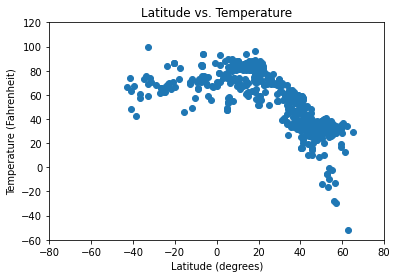

The maximum temperatures for the cities in the southern hemisphere are grouped more closely together.


In [8]:
# print and save latitude vs temperature plot
x_values = weather_data['latitude']
y_values = weather_data['temperature']
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Temperature")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (Fahrenheit)')
plt.xlim(-80,80)
plt.ylim(-60,120)
plt.savefig("Output/lat_temp.png")
plt.show()

# discussion of results
print("The maximum temperatures for the cities in the southern hemisphere are grouped more closely together.")

## Latitude vs. Humidity Plot

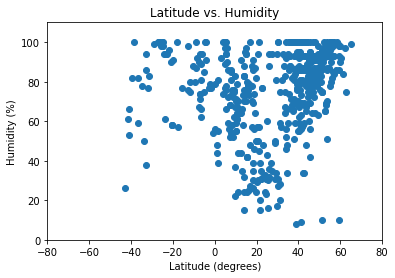

In [9]:
# print and save latitude vs humidity plot
x_values = weather_data['latitude']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Humidity")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')
plt.xlim(-80,80)
plt.ylim(0,110)
plt.savefig("Output/lat_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

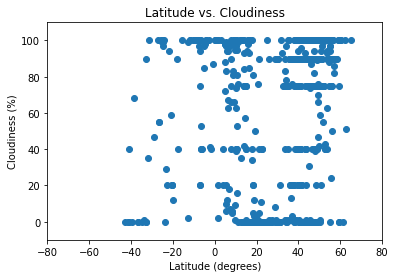

In [10]:
# print and save latitude vs cloudiness plot
x_values = weather_data['latitude']
y_values = weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Cloudiness")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
plt.xlim(-80,80)
plt.ylim(-10,110)
plt.savefig("Output/lat_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

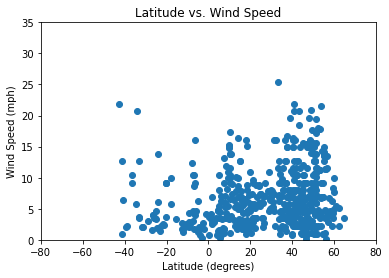

In [11]:
# print and save latitude vs wind speed plot
x_values = weather_data['latitude']
y_values = weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Wind Speed")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-80,80)
plt.ylim(0,35)
plt.savefig("Output/lat_windspeed.png")
plt.show()

## Linear Regression

In [12]:
# split weather dataset into seperate datasets for northern and southern hemisphere
northern_weather_data = weather_data.loc[weather_data["latitude"] >= 0]
southern_weather_data = weather_data.loc[weather_data["latitude"] < 0]
print(f"Number of cities in northern hemisphere: {len(northern_weather_data)}")
print(f"Number of cities in southern hemisphere: {len(southern_weather_data)}")

Number of cities in northern hemisphere: 505
Number of cities in southern hemisphere: 66


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

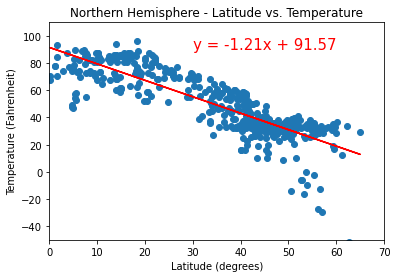

In [13]:
# select data for x and y-axis
x_values = northern_weather_data['latitude']
y_values = northern_weather_data['temperature']

# Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
y_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print and save latitude vs temperature plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Latitude vs. Temperature")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (Fahrenheit)')
plt.xlim(0,70)
plt.ylim(-50,110)
plt.plot(x_values,y_value, "r-")
plt.annotate(line_eq,(30,90),fontsize=15,color="red")
plt.savefig("Output/lat_temp_northern_hemisphere.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

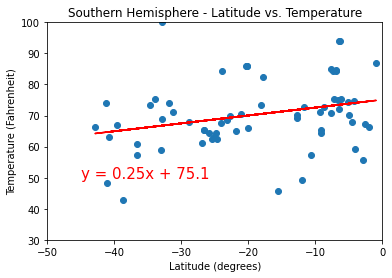

In [14]:
# select data for x and y-axis
x_values = southern_weather_data['latitude']
y_values = southern_weather_data['temperature']

# Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
y_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print and save latitude vs temperature plot
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Latitude vs. Temperature")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (Fahrenheit)')
plt.xlim(-50,0)
plt.ylim(30,100)
plt.plot(x_values,y_value, "r-")
plt.annotate(line_eq,(-45,50),fontsize=15,color="red")
plt.savefig("Output/lat_temp_southern_hemisphere.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

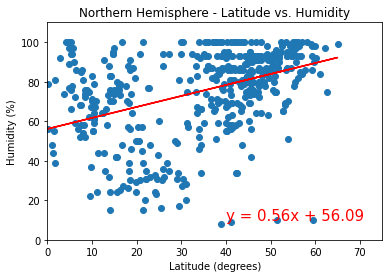

In [15]:
# select data for x and y-axis
x_values = northern_weather_data['latitude']
y_values = northern_weather_data['humidity']

# Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
y_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print and save latitude vs temperature plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')
plt.xlim(0,75)
plt.ylim(0,110)
plt.plot(x_values,y_value, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.savefig("Output/lat_humidity_northern_hemisphere.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

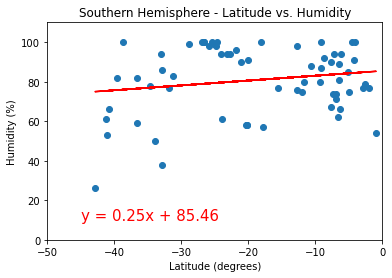

In [16]:
# select data for x and y-axis
x_values = southern_weather_data['latitude']
y_values = southern_weather_data['humidity']

# Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
y_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print and save latitude vs temperature plot
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')
plt.xlim(-50,0)
plt.ylim(0,110)
plt.plot(x_values,y_value, "r-")
plt.annotate(line_eq,(-45,10),fontsize=15,color="red")
plt.savefig("Output/lat_humidity_southern_hemisphere.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

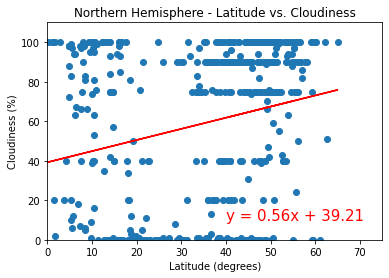

In [17]:
# select data for x and y-axis
x_values = northern_weather_data['latitude']
y_values = northern_weather_data['cloudiness']

# Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
y_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print and save latitude vs temperature plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
plt.xlim(0,75)
plt.ylim(0,110)
plt.plot(x_values,y_value, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.savefig("Output/lat_cloudiness_northern_hemisphere.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

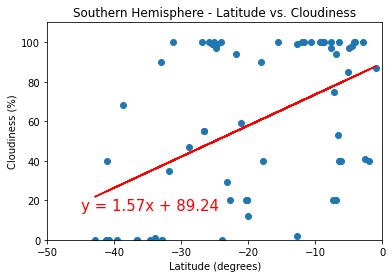

In [18]:
# select data for x and y-axis
x_values = southern_weather_data['latitude']
y_values = southern_weather_data['cloudiness']

# Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
y_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print and save latitude vs temperature plot
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
plt.xlim(-50,0)
plt.ylim(0,110)
plt.plot(x_values,y_value, "r-")
plt.annotate(line_eq,(-45,15),fontsize=15,color="red")
plt.savefig("Output/lat_cloudiness_southern_hemisphere.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

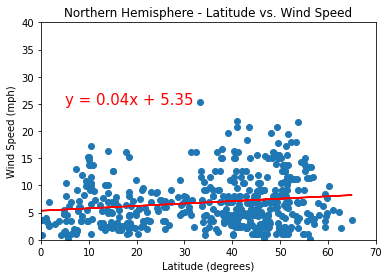

In [19]:
# select data for x and y-axis
x_values = northern_weather_data['latitude']
y_values = northern_weather_data['wind speed']

# Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
y_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print and save latitude vs temperature plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.xlim(0,70)
plt.ylim(0,40)
plt.plot(x_values,y_value, "r-")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
plt.savefig("Output/lat_windspeed_northern_hemisphere.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

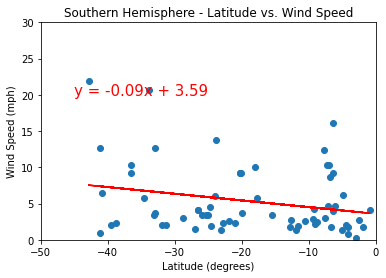

In [20]:
# select data for x and y-axis
x_values = southern_weather_data['latitude']
y_values = southern_weather_data['wind speed']
x_sorted = sorted(x_values)

# Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
y_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print and save latitude vs temperature plot
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-50,0)
plt.ylim(0,30)
plt.plot(x_values,y_value, "r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.savefig("Output/lat_windspeed_southern_hemisphere.png")
plt.show()